In [23]:
import numpy as np
from pathlib import  Path
import nibabel as nib
import pandas as pd
import os
from tqdm import tqdm

In [12]:
p = Path('public_covid_data/')
df = []
for sub_p in list(p.iterdir())[2:]:
    path_ = [ sub_p_path.as_posix() for sub_p_path in sub_p.iterdir()]
    file_ = [ os.path.split(sub_p_file)[1]  for sub_p_file in sub_p.iterdir()]
    df.append(pd.DataFrame({'path': path_, 'filename': file_}))

In [13]:
df

[                               path  filename
 0  public_covid_data/rp_im/1.nii.gz  1.nii.gz
 1  public_covid_data/rp_im/2.nii.gz  2.nii.gz
 2  public_covid_data/rp_im/3.nii.gz  3.nii.gz
 3  public_covid_data/rp_im/4.nii.gz  4.nii.gz
 4  public_covid_data/rp_im/5.nii.gz  5.nii.gz
 5  public_covid_data/rp_im/6.nii.gz  6.nii.gz
 6  public_covid_data/rp_im/7.nii.gz  7.nii.gz
 7  public_covid_data/rp_im/8.nii.gz  8.nii.gz
 8  public_covid_data/rp_im/9.nii.gz  9.nii.gz,
                                 path  filename
 0  public_covid_data/rp_msk/1.nii.gz  1.nii.gz
 1  public_covid_data/rp_msk/2.nii.gz  2.nii.gz
 2  public_covid_data/rp_msk/3.nii.gz  3.nii.gz
 3  public_covid_data/rp_msk/4.nii.gz  4.nii.gz
 4  public_covid_data/rp_msk/5.nii.gz  5.nii.gz
 5  public_covid_data/rp_msk/6.nii.gz  6.nii.gz
 6  public_covid_data/rp_msk/7.nii.gz  7.nii.gz
 7  public_covid_data/rp_msk/8.nii.gz  8.nii.gz
 8  public_covid_data/rp_msk/9.nii.gz  9.nii.gz]

In [14]:
df = df[0].merge(df[1], on='filename', suffixes=('_im', '_mask'))

In [15]:
def load_nifti(path_):
    im_nifti_ = nib.load(path_)
    data_ = im_nifti_.get_fdata()
    data_ =  np.transpose(data_)
    
    return data_


In [16]:
df['slice_num'] = np.nan

In [17]:
df

,path_im,filename,path_mask,slice_num
0,public_covid_data/rp_im/1.nii.gz,1.nii.gz,public_covid_data/rp_msk/1.nii.gz,NaN
1,public_covid_data/rp_im/2.nii.gz,2.nii.gz,public_covid_data/rp_msk/2.nii.gz,NaN
2,public_covid_data/rp_im/3.nii.gz,3.nii.gz,public_covid_data/rp_msk/3.nii.gz,NaN
3,public_covid_data/rp_im/4.nii.gz,4.nii.gz,public_covid_data/rp_msk/4.nii.gz,NaN
4,public_covid_data/rp_im/5.nii.gz,5.nii.gz,public_covid_data/rp_msk/5.nii.gz,NaN
5,public_covid_data/rp_im/6.nii.gz,6.nii.gz,public_covid_data/rp_msk/6.nii.gz,NaN
6,public_covid_data/rp_im/7.nii.gz,7.nii.gz,public_covid_data/rp_msk/7.nii.gz,NaN
7,public_covid_data/rp_im/8.nii.gz,8.nii.gz,public_covid_data/rp_msk/8.nii.gz,NaN
8,public_covid_data/rp_im/9.nii.gz,9.nii.gz,public_covid_data/rp_msk/9.nii.gz,NaN


In [24]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 9/9 [00:19<00:00,  2.20s/it]


In [25]:
df

,path_im,filename,path_mask,slice_num
0,public_covid_data/rp_im/1.nii.gz,1.nii.gz,public_covid_data/rp_msk/1.nii.gz,45.0
1,public_covid_data/rp_im/2.nii.gz,2.nii.gz,public_covid_data/rp_msk/2.nii.gz,39.0
2,public_covid_data/rp_im/3.nii.gz,3.nii.gz,public_covid_data/rp_msk/3.nii.gz,418.0
3,public_covid_data/rp_im/4.nii.gz,4.nii.gz,public_covid_data/rp_msk/4.nii.gz,39.0
4,public_covid_data/rp_im/5.nii.gz,5.nii.gz,public_covid_data/rp_msk/5.nii.gz,66.0
5,public_covid_data/rp_im/6.nii.gz,6.nii.gz,public_covid_data/rp_msk/6.nii.gz,42.0
6,public_covid_data/rp_im/7.nii.gz,7.nii.gz,public_covid_data/rp_msk/7.nii.gz,42.0
7,public_covid_data/rp_im/8.nii.gz,8.nii.gz,public_covid_data/rp_msk/8.nii.gz,45.0
8,public_covid_data/rp_im/9.nii.gz,9.nii.gz,public_covid_data/rp_msk/9.nii.gz,93.0


In [28]:
import seaborn as sns

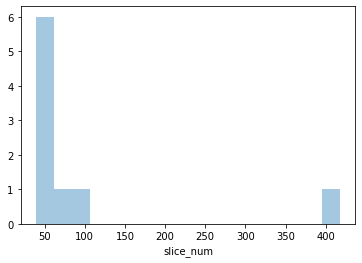

In [32]:
sns.distplot(df['slice_num'], kde=False)

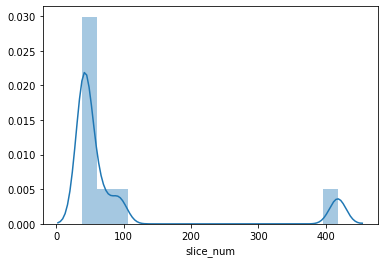

In [33]:
sns.distplot(df['slice_num'] )

In [40]:
df.loc[0]

path_im       public_covid_data/rp_im/1.nii.gz
filename                              1.nii.gz
path_mask    public_covid_data/rp_msk/1.nii.gz
slice_num                                   45
Name: 0, dtype: object

In [41]:
data_ = load_nifti(df.loc[0][2])

In [42]:
data_.shape

(45, 630, 630)

In [43]:
data_

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [45]:
np.unique(data_[0])

array([0., 1.])

In [46]:
np.unique(data_)

array([0., 1., 2.])